## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mouse = mouse_metadata.merge(study_results)
# Display the data table for preview
merged_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = len(merged_mouse['Mouse ID'].value_counts())
total_mice_df = pd.DataFrame({'Total Number of Mice': total_mice}, index=[0])
total_mice_df

,Total Number of Mice
0,249


In [3]:
merged_mouse.duplicated(subset=['Mouse ID', 'Timepoint'])
merged_mouse.loc[merged_mouse.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False), 'Mouse ID'].unique()

array(['g989'], dtype=object)

In [4]:
clean_mice = merged_mouse[merged_mouse['Mouse ID'] != 'g989']
len(clean_mice['Mouse ID'].value_counts())

248

In [5]:
# Checking the number of mice in the clean DataFrame.
total_clean_mice = len(clean_mice['Mouse ID'].value_counts())
total_clean_mice_df = pd.DataFrame({'Total Number of Clean Mice': total_clean_mice}, index=[0])
total_clean_mice_df


,Total Number of Clean Mice
0,248


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_reg = clean_mice.groupby('Drug Regimen')
drug_sum = clean_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].sum()
drug_mean = clean_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().round(3)
drug_median = clean_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().round(3)
drug_var = clean_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().round(3)
drug_std = clean_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().round(3) 
drug_sem = clean_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().round(3)
# Assemble the resulting series into a single summary dataframe.
drug_summary = pd.DataFrame({'Mean': drug_mean, 'Median': drug_median, 'Varience': drug_var, 'STD': drug_std, 'SEM': drug_sem})
drug_summary

,Mean,Median,Varience,STD,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_mice.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean' , 'median' , 'var' , 'std' , 'sem' ]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

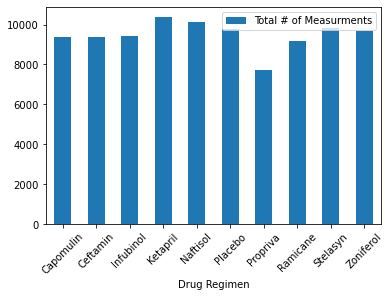

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
clean_mice_df = pd.DataFrame({'Total # of Measurments': drug_sum})
clean_mice_df.plot(kind = 'bar', rot=45)


In [9]:
clean_mice_total =clean_mice['Drug Regimen'].value_counts()

In [10]:
drug_reg = clean_mice_total.index.values


['Capomulin', 'Ramicane', 'Zoniferol', 'Infubinol', 'Ceftamin']

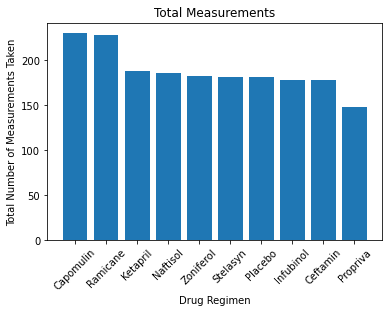

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.title("Total Measurements")
plt.bar(drug_reg, clean_mice_total)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Measurements Taken')
plt.xticks(rotation=45)
plt.plot()
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B443DE50F0>],
      dtype=object)

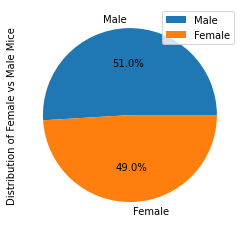

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mice = clean_mice['Sex'].value_counts()
gender_mice_df = pd.DataFrame({'Distribution of Female vs Male Mice': gender_mice})
gender_mice_df.plot(kind='pie', subplots=True, autopct="%1.1f%%")


Text(0.5, 1.0, 'Distribution of Female vs Male Mice')

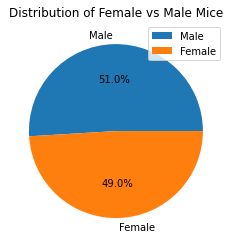

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_mice, labels = ['Male', 'Female'], autopct="%1.1f%%")
plt.legend()
plt.title("Distribution of Female vs Male Mice")

## Quartiles, Outliers and Boxplots

In [14]:
clean_mice.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
clean_mice_new = clean_mice.drop_duplicates('Mouse ID', keep="last")                          
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_clean_mice = clean_mice_new.merge(clean_mice)
#clean_mice_reg = clean_mice_new.loc[clean_mice['Drug Regimen']=='Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#clean_mice_reg.head(5)

In [25]:
# Put treatments into a list for for loop (and later for plot labels)
drug_reg_list = [drug_reg[0], drug_reg[1], drug_reg[4], drug_reg[7], drug_reg[8]]
drug_reg_list

# Create empty list to fill with tumor vol data (for plotting)
final_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in merged_clean_mice:
    target_url = base_url + show
    response = requests.get(target_url).json()
    titles.append(response[0]['show']['name'])
    ratings.append(response[0]['show']['rating']['average'])
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

['Capomulin', 'Ramicane', 'Zoniferol', 'Infubinol', 'Ceftamin']

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
clean_mice_cap = clean_mice.loc[clean_mice['Drug Regimen']=='Capomulin']
cap_mouse = clean_mice_cap.loc[clean_mice_cap['Mouse ID']=='s185']
plt.plot(cap_mouse['Timepoint'], cap_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Timepoint of Mouse S185')

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#cap_mean = clean_mice_cap['Tumor Volume (mm3)'].mean()
cap_mean = clean_mice_cap.groupby(['Mouse ID']).mean()
cap_weight = cap_mean['Weight (g)']
cap_vol = cap_mean['Tumor Volume (mm3)']

In [ ]:
plt.scatter(cap_weight, cap_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Weight of Capomulin Mice')

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_weight = cap_mean.iloc[:,1]
corr_vol = cap_mean.iloc[:,3]
correlation = sts.pearsonr(corr_weight, corr_vol)
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr)= linregress(cap_weight, cap_vol)
regress_values = cap_weight * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.scatter(cap_weight, cap_vol)
plt.plot(cap_weight,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Weight of Capomulin Mice')
plt.show()
